In [99]:
import cv2
import os 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [101]:
def AdjustColorRange(image):
    norm_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

    return norm_image

In [102]:
def BackgroundSubtraction(image):
  background = cv2.GaussianBlur(image, (51, 51), 0)
  corrected_image = cv2.subtract(image, background)
  return corrected_image

In [103]:
def Threshold(image):
  '''segment the image based on detected edges'''
  edges = cv2.Canny(image, 100, 200)
  contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  filled_image = np.zeros_like(image)
  cv2.drawContours(filled_image, contours, -1, 255, thickness=cv2.FILLED)
  return filled_image, contours

In [104]:
def extract_shape_metrics(data_path, contours):
  '''extracts shape metrics from each detected spot'''
  metrics = []
  for contour in contours:
    perimeter = cv2. arcLength(contour, True)
    area = cv2.contourArea(contour)
    if len(contour) >= 5:  
            ellipse = cv2.fitEllipse(contour)
            (center, axes, orientation) = ellipse
            major_axis_length = max(axes)
            minor_axis_length = min(axes)  
    M = cv2.moments(contour)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = None, None  
        continue
    if area<100:
        continue

    metrics.append({
        'perimeter': perimeter,
        'area': area,
        'minor_axis_length': minor_axis_length,
        'centroid': (cx, cy)  # x, y position of the centroid
    })
  return metrics

In [ ]:
def GetSporeID(data_path, centroid):
  pass

In [105]:
def Main(image_folder_path, data_path):
  if "ThT" in image_folder_path:
    image_type = "ThT"
  if "PhC" in image_folder_path:
    image_type = "PhC"  
  for image_file in os.listdir(image_folder_path):
    image_path = os.path.join(image_folder_path, image_file)
    image = cv2.imread(image_path)
    image = BackgroundSubtraction(image)
    image = AdjustColorRange(image)
    image, contours = Threshold(image)
    shape_metrics = extract_shape_metrics(data_path, contours)

    for i, metric in enumerate(shape_metrics):
      print(f"Contour {i+1}: Perimeter = {metric['perimeter']}, Area = {metric['area']}, "
          f"Minor Axis Length = {metric['minor_axis_length']}, Centroid = {metric['centroid']}")
      GetSporeID(data_path, metric["centroid"])
      
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    break 


Contour 1: Perimeter = 66.87005722522736, Area = 277.5, Minor Axis Length = 14.772748947143555, Centroid = (916, 1717)
Contour 2: Perimeter = 79.59797883033752, Area = 278.0, Minor Axis Length = 14.591851234436035, Centroid = (858, 1718)
Contour 3: Perimeter = 66.18376553058624, Area = 261.5, Minor Axis Length = 14.864418029785156, Centroid = (1154, 1710)
Contour 4: Perimeter = 66.52691161632538, Area = 267.5, Minor Axis Length = 14.97678279876709, Centroid = (1389, 1708)
Contour 5: Perimeter = 68.76955163478851, Area = 287.0, Minor Axis Length = 14.714863777160645, Centroid = (812, 1696)
Contour 6: Perimeter = 66.62741649150848, Area = 282.0, Minor Axis Length = 14.762545585632324, Centroid = (914, 1691)
Contour 7: Perimeter = 73.5979790687561, Area = 263.0, Minor Axis Length = 14.868199348449707, Centroid = (1675, 1685)
Contour 8: Perimeter = 69.01219248771667, Area = 271.5, Minor Axis Length = 13.973057746887207, Centroid = (1798, 1689)
Contour 9: Perimeter = 66.28427076339722, Area

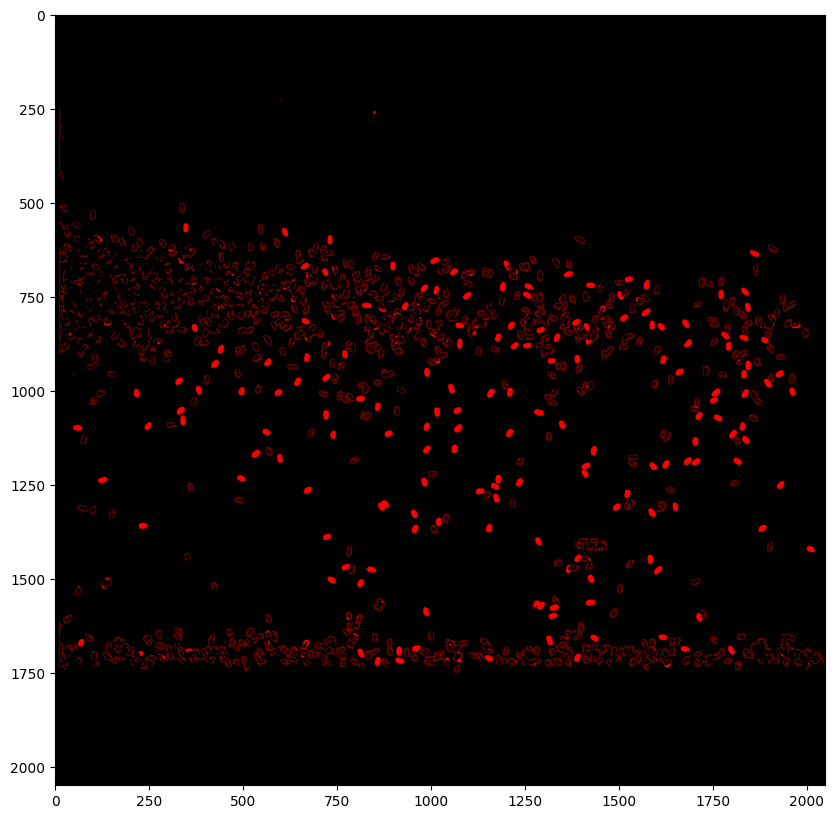

In [106]:
if __name__ == "__main__":
  image_folder_path = "/Users/alexandranava/Desktop/Spores/M4581_s1/ThT/"
  data_csv = "/Users/alexandranava/Desktop/Spores/M4581_s1/test.csv"
  Main(image_folder_path)
